# IRCADb Segmentation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IRCADb-Segmentation" data-toc-modified-id="IRCADb-Segmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IRCADb Segmentation</a></span><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resources</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-in-and-process-data" data-toc-modified-id="Load-in-and-process-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load in and process data</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Post-processing" data-toc-modified-id="Post-processing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Post-processing</a></span></li><li><span><a href="#Show-results" data-toc-modified-id="Show-results-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Show results</a></span></li></ul></li></ul></div>

## Resources
___
* Article: 
    * https://medium.com/@fabio.sancinetti/u-net-convnet-for-ct-scan-segmentation-6cc0d465eed3
* Dataset:
    * https://www.ircad.fr/research/3d-ircadb-01/
* CUDA / cuDNN:
    * https://stackoverflow.com/questions/51111954/tensorflow-cant-find-cudart64-90-dll-even-though-it-is-installed-with-path-va
    * https://stackoverflow.com/questions/51112126/gpu-sync-failed-while-using-tensorflow

## Imports

In [1]:
# Imports jtplot submodule from jupyterthemes, sets notebook theme for plots.
# Nice to have if you are using jupyterthemes, otherwise ignore this. 
try:
    __import__('imp').find_module('jupyterthemes')
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    pass

# General imports
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

# Machine learning imports
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam, Adadelta, Adamax, Nadam, Adagrad, SGD, RMSprop

# My modules
import ircad
import unet

Using TensorFlow backend.


## Load in and process data

In [2]:
# Load in the data from the root_dir
root_dir = "../kidney-data/data/3dircadb01/"

sample_height, sample_width = (128, 128)

sess = tf.Session()
K.set_session(sess)

dataset = ircad.IRCAD(root_dir, 'liver') # Also works for 'liver'

data = dataset.getData(False, 0.75, sample_width) # Using 75% for training
train_x, train_y, test_x, test_y = map(np.array, data)
print("Using %s images for training and %s images for testing" % (len(train_x), len(test_x)))

Using 168 images for training and 56 images for testing


Training image examples (slice, segmentation label)


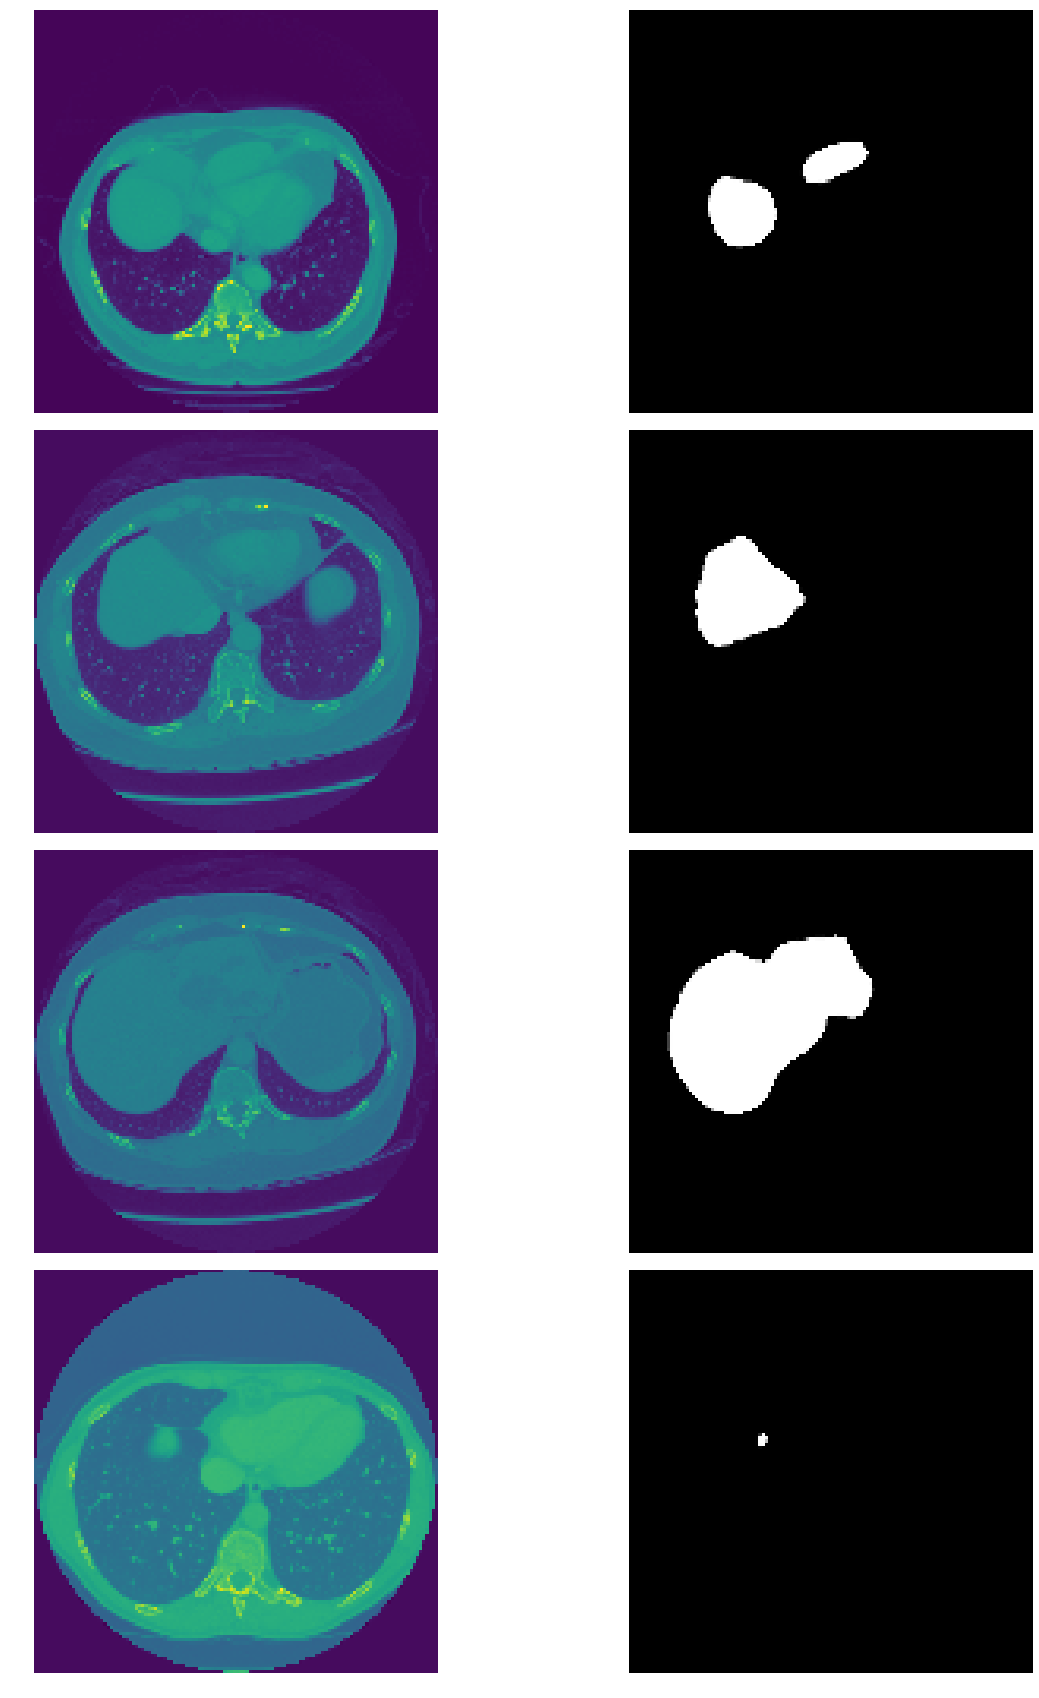

In [3]:
# Displaying some samples of the input.
lines = min(4, len(train_x))
fig, axarr = plt.subplots(lines, 2, figsize=(20, 20), sharex=True, sharey=False)
fig.suptitle('Training image examples (slice, segmentation label)', fontsize=60)

# Reshape the training images to the desired output width for the plot and show them.
for i in range(0,lines):
    axarr[i, 0].imshow(train_x[i], cmap='viridis')
    axarr[i, 1].imshow(train_y[i], cmap='gray')
    for x in range(2):
        axarr[i,x].axis('off')
print('Training image examples (slice, segmentation label)')
fig.tight_layout(); fig.subplots_adjust(top=1.175); plt.show()

In [4]:
# Reshape training and test data/labels to the specified sample width and height.
train_x = np.array([t.reshape(sample_width, sample_height, 1) for t in train_x])
train_y = np.array([t.reshape(sample_width, sample_height, 1) for t in train_y])
test_x  = np.array([t.reshape(sample_width, sample_height, 1) for t in test_x])
test_y  = np.array([t.reshape(sample_width, sample_height, 1) for t in test_y])

## Train the model

In [5]:
# Initialize the U-Net and fit it to the training data.
unet_model = unet.UNet()
start_time = time.time()
history = unet_model.fit(train_x, train_y, epochs=150)
elapsed_time = time.time() - start_time
print("Elapsed time: ", elapsed_time)

Train on 134 samples, validate on 34 samples
Epoch 1/150
134/134 [==============================] - 9s 71ms/step - loss: -0.0835 - _dice_coef: 0.0835 - val_loss: -0.1177 - val__dice_coef: 0.1177
Epoch 2/150
134/134 [==============================] - 1s 4ms/step - loss: -0.1689 - _dice_coef: 0.1689 - val_loss: -0.3635 - val__dice_coef: 0.3635
Epoch 3/150
134/134 [==============================] - 1s 4ms/step - loss: -0.3292 - _dice_coef: 0.3292 - val_loss: -0.4387 - val__dice_coef: 0.4387
Epoch 4/150
134/134 [==============================] - 1s 4ms/step - loss: -0.4654 - _dice_coef: 0.4654 - val_loss: -0.6273 - val__dice_coef: 0.6273
Epoch 5/150
134/134 [==============================] - 1s 4ms/step - loss: -0.6005 - _dice_coef: 0.6005 - val_loss: -0.6916 - val__dice_coef: 0.6916
Epoch 6/150
134/134 [==============================] - 1s 4ms/step - loss: -0.6905 - _dice_coef: 0.6905 - val_loss: -0.7478 - val__dice_coef: 0.7478
Epoch 7/150
134/134 [==============================] - 1s 4m

134/134 [==============================] - 1s 4ms/step - loss: -0.9637 - _dice_coef: 0.9637 - val_loss: -0.9540 - val__dice_coef: 0.9540
Epoch 56/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9632 - _dice_coef: 0.9632 - val_loss: -0.9527 - val__dice_coef: 0.9527
Epoch 57/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9640 - _dice_coef: 0.9640 - val_loss: -0.9542 - val__dice_coef: 0.9542
Epoch 58/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9651 - _dice_coef: 0.9651 - val_loss: -0.9562 - val__dice_coef: 0.9562
Epoch 59/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9671 - _dice_coef: 0.9671 - val_loss: -0.9556 - val__dice_coef: 0.9556
Epoch 60/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9669 - _dice_coef: 0.9669 - val_loss: -0.9578 - val__dice_coef: 0.9578
Epoch 61/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9689 - _dice_coef: 0.9689 - val_lo

134/134 [==============================] - 1s 4ms/step - loss: -0.9783 - _dice_coef: 0.9783 - val_loss: -0.9659 - val__dice_coef: 0.9659
Epoch 110/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9762 - _dice_coef: 0.9762 - val_loss: -0.9624 - val__dice_coef: 0.9624
Epoch 111/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9754 - _dice_coef: 0.9754 - val_loss: -0.9630 - val__dice_coef: 0.9630
Epoch 112/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9765 - _dice_coef: 0.9765 - val_loss: -0.9617 - val__dice_coef: 0.9617
Epoch 113/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9756 - _dice_coef: 0.9756 - val_loss: -0.9629 - val__dice_coef: 0.9629
Epoch 114/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9763 - _dice_coef: 0.9763 - val_loss: -0.9641 - val__dice_coef: 0.9641
Epoch 115/150
134/134 [==============================] - 1s 4ms/step - loss: -0.9758 - _dice_coef: 0.9758 - 

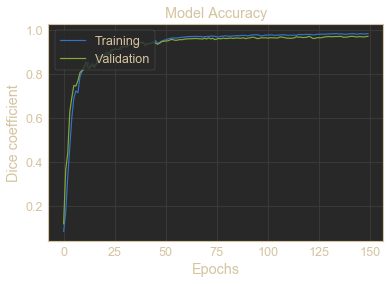

56/56 [==============================] - 0s 2ms/step
Average dice coefficient for predictions: 0.937608610357347


In [11]:
# Plot the losses from the model's history
unet_model.plot()

# Predict the masks for the test set
imgs_mask_test = unet_model.predict(test_x, verbose=1)

# Calculate the average dice values for the test set predictions
tot_dice = 0; dices = []
for i in range(len(imgs_mask_test)):
    r = unet.dice_coef(test_y[i], imgs_mask_test[i])
    dices.append(r)
    tot_dice += r
avg_dice = tot_dice / float(len(imgs_mask_test))
print('Average dice coefficient for predictions:', avg_dice)

## Post-processing

In [14]:
def postprocess(img_masks: np.array):
    """Remove areas of the mask where there is low confidence."""
    for k in range(len(img_masks)):
        mask = img_masks[k]
        for i in range(len(mask)):
            for j in range(len(mask[i])):
                if mask[i, j] < 0.5:
                    mask[i, j] = 0
    return img_masks

In [15]:
# Do post-processing operations on the masks
do_postprocessing = False
if do_postprocessing:
    imgs_mask_test = postprocess(imgs_mask_test)
    
# Recalculate dice coefficient
tot_dice = 0; dices = []
for i in range(len(imgs_mask_test)):
    r = unet.dice_coef(test_y[i], imgs_mask_test[i])
    dices.append(r)
    tot_dice += r
avg_dice = tot_dice / float(len(imgs_mask_test))
print(avg_dice)

0.937608610357347


## Show results

In [29]:
def displayResults(predicted, test_x, test_y):
    lines = max(15, len(predicted))
    fig, axarr = plt.subplots(lines, 3, figsize=(60, lines * 10), sharex=True, sharey=False)

    output_width, output_height = (128, 128)

    for i in range(0,lines):
        axarr[i, 0].imshow(test_x[i].reshape(output_width, output_height), cmap='viridis')
        axarr[i, 1].imshow(test_y[i].reshape(output_width, output_height), cmap='gray')
        axarr[i, 2].imshow(predicted[i].reshape(output_width, output_height), cmap='gray')
        axarr[i, 0].set_title('Test slice ' + str(i), fontsize=45, ha='center')
        axarr[i, 1].set_title('Test label ' + str(i), fontsize=45, ha='center')
        axarr[i, 2].set_title('Predicted dice coeff. = ' + str(round(dices[i], 5)), 
                              fontsize=45, ha='center')

        for x in range(3):
            axarr[i,x].axis('off')

    fig.suptitle('Average prediction dice coefficient = ' + str(avg_dice), fontsize=60)
    fig.tight_layout()
    fig.subplots_adjust(top=0.975)
    plt.show()

In [30]:
displayResults(imgs_mask_test, test_x, test_y)